In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [23]:
# Load the dataset
file_path = './data/owid-covid-data.csv'
data = pd.read_csv(file_path)
data = data.drop(columns=['total_cases',
       'new_cases_smoothed', 'total_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million',
       'icu_patients_per_million', 
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
    'tests_per_case', 'tests_units', 'total_vaccinations',
        'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
        'median_age',
       'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'population',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'])
print(data.columns)

Index(['iso_code', 'continent', 'location', 'date', 'new_cases', 'new_deaths',
       'reproduction_rate', 'icu_patients', 'hosp_patients', 'new_tests',
       'positive_rate', 'people_vaccinated', 'population_density',
       'aged_65_older', 'aged_70_older', 'extreme_poverty'],
      dtype='object')


In [30]:
# Convert the datetime 'new_deaths' to a datetime object
data['date'] = pd.to_datetime(data['date'])
data = data.groupby('date').sum().reset_index()

# Set the datetime 'new_deaths' as the index
data.set_index('date', inplace=True)


KeyError: 'date'

In [ ]:
plot_cols = ['new_deaths']
plot_features = data[plot_cols]
_ = plot_features.plot(subplots=True)

plot_features = data[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [25]:
# Display the first few rows of the dataset
print(data.head())


            new_cases  new_deaths  reproduction_rate  icu_patients  \
date                                                                 
2020-01-01        0.0         0.0                0.0           0.0   
2020-01-02        0.0         0.0                0.0           0.0   
2020-01-03        0.0         0.0                0.0           0.0   
2020-01-04       14.0         0.0                0.0           0.0   
2020-01-05        0.0        15.0                0.0           0.0   

            hosp_patients  new_tests  positive_rate  people_vaccinated  \
date                                                                     
2020-01-01            0.0       29.0            0.0                0.0   
2020-01-02            0.0      167.0            0.0                0.0   
2020-01-03            0.0       94.0            0.0                0.0   
2020-01-04            0.0      123.0            0.0                0.0   
2020-01-05            0.0       97.0            0.0              

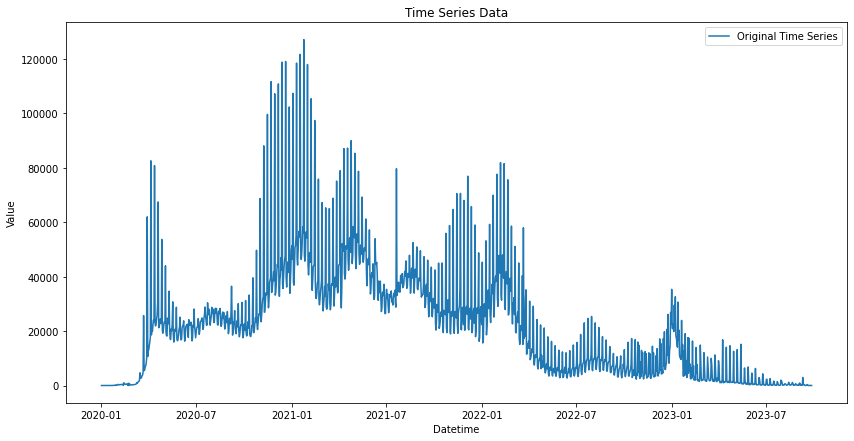

In [26]:
# Plot the entire time series data
plt.figure(figsize=(14, 7))
plt.plot(data['new_deaths'], label='Original Time Series')
plt.title('Time Series Data')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.show()


In [27]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(
    data['new_deaths'], model='aditive', period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


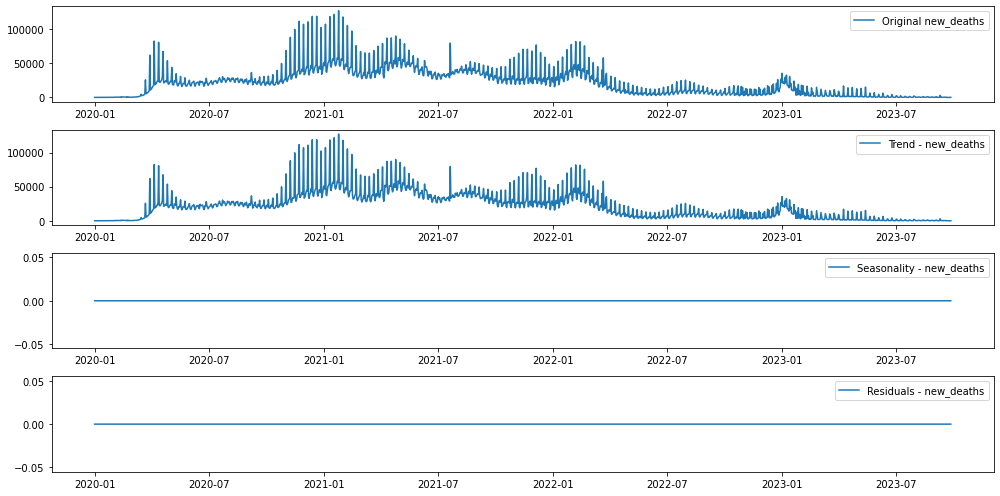

count      1366.000000
mean      21305.585652
std       19948.296074
min           0.000000
25%        4005.000000
50%       19927.000000
75%       32573.250000
max      127161.000000
Name: new_deaths, dtype: float64


In [28]:
# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(data['new_deaths'], label=f'Original new_deaths')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label=f'Trend - new_deaths')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label=f'Seasonality - new_deaths')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label=f'Residuals - new_deaths')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Display summary statistics for the current 'new_deaths'
print(data['new_deaths'].describe())


In [29]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data,
                        tsmode=True,
                        sortby="date",
                        )
profile.to_file('profile_report.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 41.64it/s]
